# Spotify Most Streamed Songs in 2023 Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction
In the ever-evolving landscape of music streaming, understanding the trends and preferences of listeners is crucial for both artists and the music industry. With Spotify being one of the world's leading music platforms, it provides a valuable treasure trove of data that can shed light on the songs and artists that captured the hearts and ears of millions in 2023. In this project, we delve into an analysis of Spotify's most streamed songs for the year 2023. Our exploration will uncover the top tracks, artists, and genres that defined the music landscape during this period, providing valuable insights into the ever-changing world of music streaming.

## Dataset Description 

> This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

## Use Case

>* Trending songs and singers: Explore the most listened songs and singers
>* Temporal trends: Identify streams over months and years and its distribution
>* Music analysis: Explore patterns in audio features to understand trends and preferences in popular songs.
>* Platforms comparison: Compare the song's popularity across different music platforms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <a id='wrangling'></a>
# Data Wrangling

In [2]:
#loading data into notebook
df = pd.read_csv('C:\\Users\\u3\\Desktop\\python-spotify\\spotify-2023.csv', encoding='latin-1')

In [3]:
#displaying sample of dataset
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [4]:
#print number of rows and columns in dataset
df.shape

(953, 24)

In [5]:
#print datatypes in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
#convert 'stream' datatype to float
df['streams'] = df['streams'].astype(float)

ValueError: could not convert string to float: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'


>### There is a string row in the column caused the error

In [7]:
#so i replaced it by NaN value
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [8]:
#print number of null values
df['streams'].isna().sum()

1

>### To replace this null value i found the average of the most common values

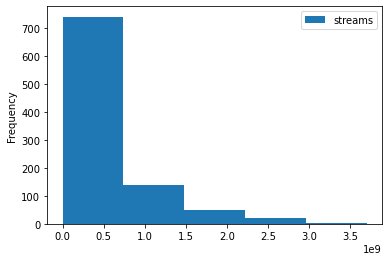

In [9]:
df.plot(y='streams', kind='hist', bins=5)
plt.show()

>### Through the hist i found that most of values nearly < 730000000

In [10]:

most_of_values_mean=df[df['streams']<730000000]['streams'].mean()
df['streams'].fillna(most_of_values_mean,inplace=True)


In [11]:
#now there is no null values
df['streams'].isna().sum()

0

In [12]:
#here i convert also 'in_deezer_playlists' datatype to int
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)

ValueError: invalid literal for int() with base 10: '2,445'

>### Couldn't convert the column type as values contains comma

In [13]:
#to know values that are not numeric
non_integer_rows = df[~df['in_deezer_playlists'].astype(str).str.isnumeric()]

In [14]:
non_integer_rows['in_deezer_playlists']

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object

In [15]:
#remove ","
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '', regex=True)

In [16]:
# convert its date type again
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)

In [17]:
df['in_deezer_playlists'].dtypes

dtype('int32')

In [18]:
#here also converting 'in_shazam_charts' datatype to int
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)

ValueError: invalid literal for int() with base 10: '1,021'

>### Also this column has the same problem of the previous column

In [19]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '', regex=True)
df['in_shazam_charts'].fillna(0,inplace=True)
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)
df['in_shazam_charts'].dtypes

dtype('int32')

In [20]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)

In [21]:
df['in_deezer_playlists'].dtypes

dtype('int32')

In [22]:
# the column has 50 null values so i replace them with 0
df['in_deezer_playlists'] = df['in_deezer_playlists'].fillna(0)

In [23]:
#now there are no null values
df['in_deezer_playlists'].isna().sum()

0

In [24]:
#there are many null values in 'key' i replaced them
df['key'] = df['key'].fillna('No Record')

In [25]:
#print duplicates in dataset
df.duplicated().sum()

0

In [26]:
#number of unique values in dataset
df.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      12
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [27]:
#print statistics values for dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139e+00,8.930442e-01,1.0,1.0,1.0,2.0,8.000000e+00
released_year,953.0,2.018238e+03,1.111622e+01,1930.0,2020.0,2022.0,2022.0,2.023000e+03
released_month,953.0,6.033578e+00,3.566435e+00,1.0,3.0,6.0,9.0,1.200000e+01
released_day,953.0,1.393075e+01,9.201949e+00,1.0,6.0,13.0,22.0,3.100000e+01
in_spotify_playlists,953.0,5.200125e+03,7.897609e+03,31.0,875.0,2224.0,5542.0,5.289800e+04
in_spotify_charts,953.0,1.200944e+01,1.957599e+01,0.0,0.0,3.0,16.0,1.470000e+02
streams,953.0,5.138724e+08,5.666182e+08,2762.0,141720999.0,290228626.0,673801126.0,3.703895e+09
in_apple_playlists,953.0,6.781217e+01,8.644149e+01,0.0,13.0,34.0,88.0,6.720000e+02
in_apple_charts,953.0,5.190871e+01,5.063024e+01,0.0,7.0,38.0,87.0,2.750000e+02
in_deezer_playlists,953.0,3.851878e+02,1.130536e+03,0.0,13.0,44.0,164.0,1.236700e+04


<a id='eda'></a>
# Exploratory Data Analysis


# 
>### Trending songs and singers👇


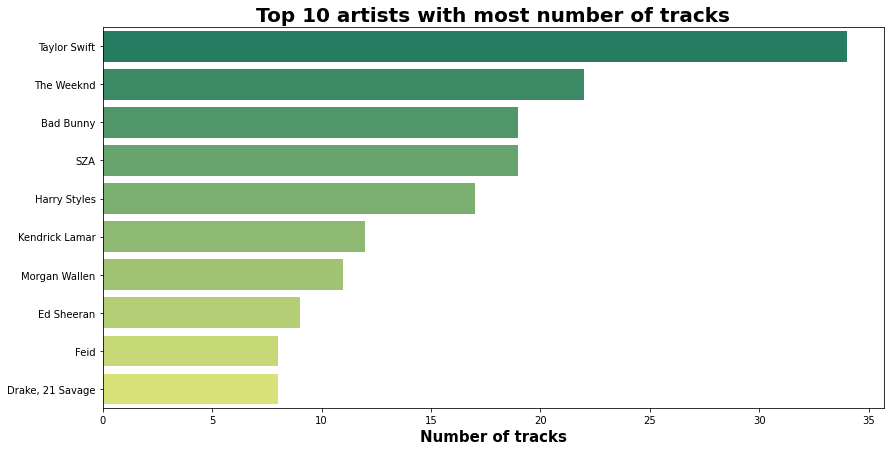

In [28]:
leading_artists = df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(14,7))
sns.barplot(x = leading_artists, y = leading_artists.index, palette='summer')
plt.title('Top 10 artists with most number of tracks', fontsize=20, fontweight='bold')
plt.xlabel('Number of tracks',fontsize=15, fontweight='bold')
plt.show()

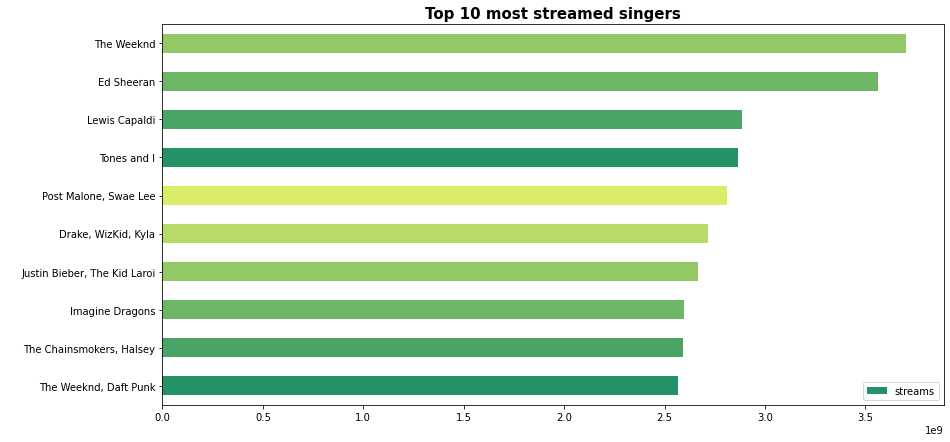

In [29]:
song_streams = df[['artist(s)_name','streams']].sort_values(by = 'streams',ascending=False).head(10)[::-1]
            
song_streams.plot(x='artist(s)_name', y='streams', kind='barh',figsize=(14, 7),color=sns.color_palette('summer'))
plt.title('Top 10 most streamed singers',fontsize=15, fontweight='bold')
plt.ylabel(' ')
plt.show()

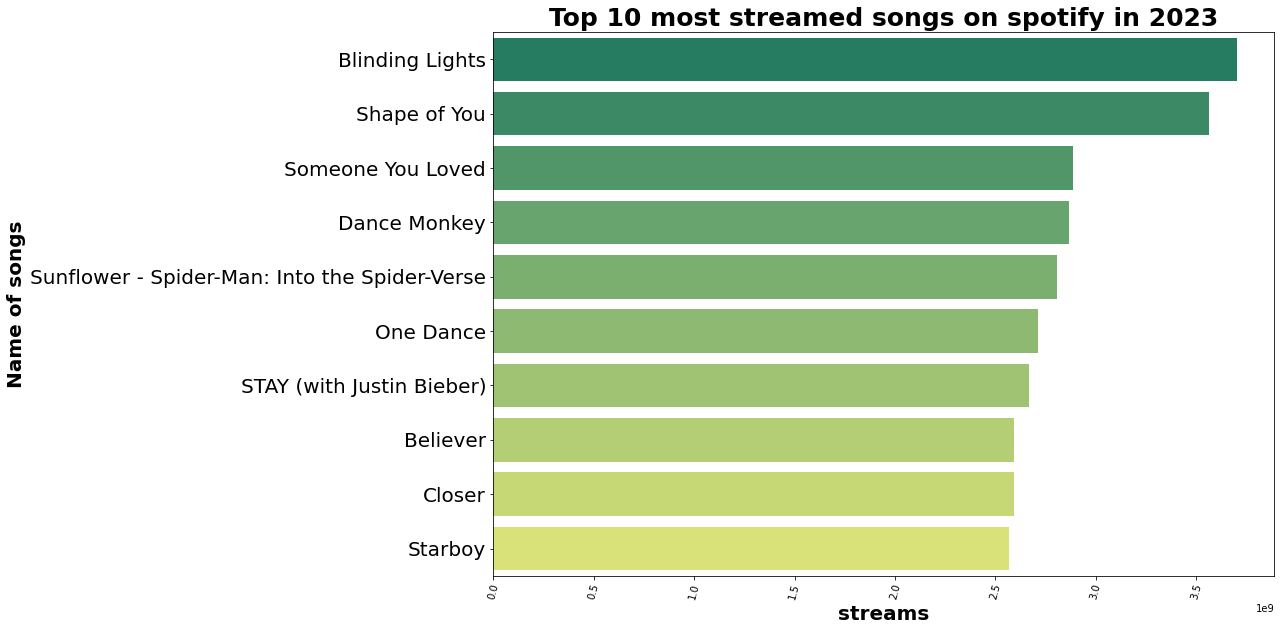

In [30]:
most_streamed_songs = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(14,10))
sns.barplot(x = 'streams', y = 'track_name', data = most_streamed_songs,palette='summer')
plt.xticks(rotation=75)
plt.yticks(fontsize=20)
plt.xlabel('streams', fontweight = 'bold', fontsize=20)
plt.ylabel('Name of songs', fontweight = 'bold', fontsize=20)
plt.title('Top 10 most streamed songs on spotify in 2023', fontweight = 'bold', fontsize=25)
plt.show()

# 
>### streams over months and years👇

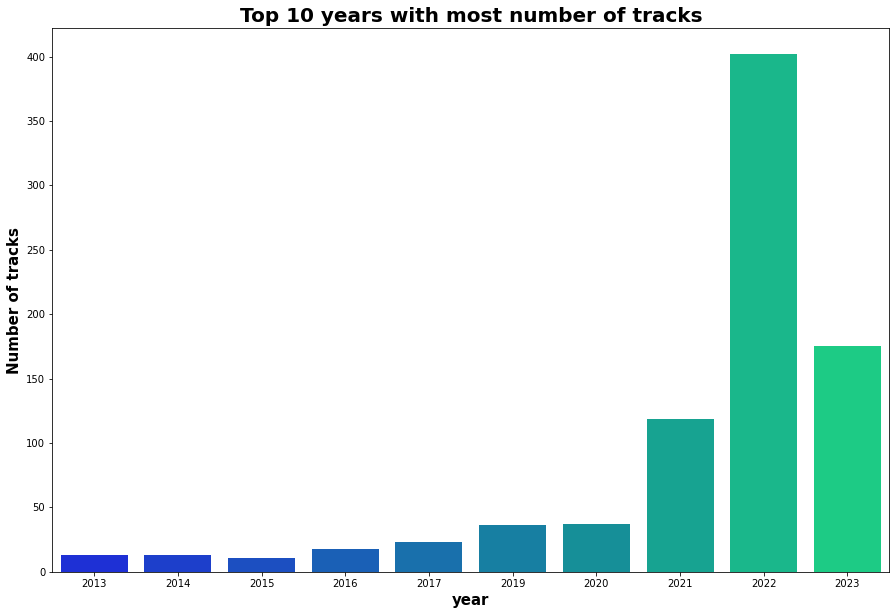

In [31]:
Released_year = df['released_year'].value_counts().head(10)
plt.figure(figsize=(15,10))
sns.barplot(x=Released_year.index,y=Released_year, palette='winter')
plt.title('Top 10 years with most number of tracks', fontsize=20, fontweight='bold')
plt.ylabel('Number of tracks',fontsize=15, fontweight='bold')
plt.xlabel('year',fontsize=15, fontweight='bold')
plt.show()

Text(0.5, 0, 'year')

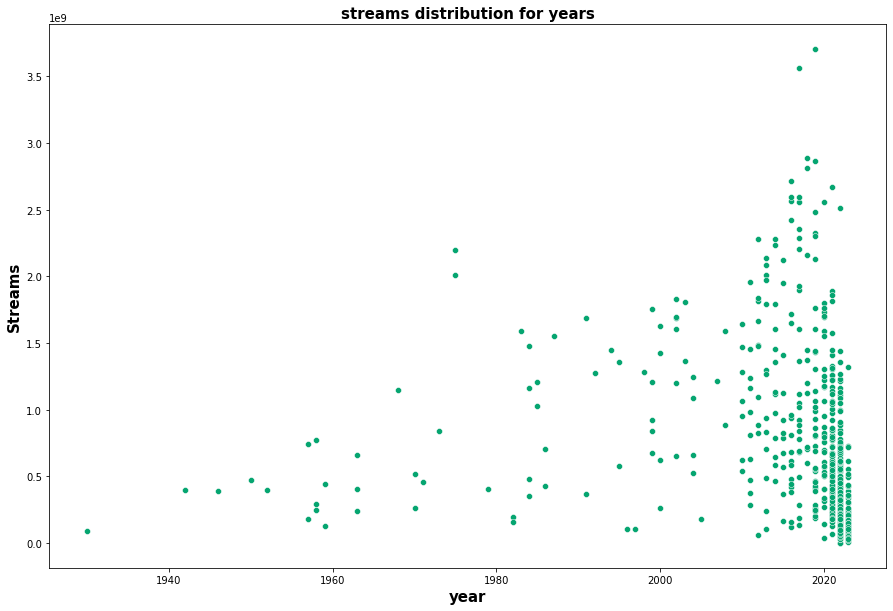

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='streams',x='released_year',data=df,color='#05a570')
plt.title('streams distribution for years',fontsize=15, fontweight='bold')
plt.ylabel('Streams',fontsize=15, fontweight='bold')
plt.xlabel('year',fontsize=15, fontweight='bold')

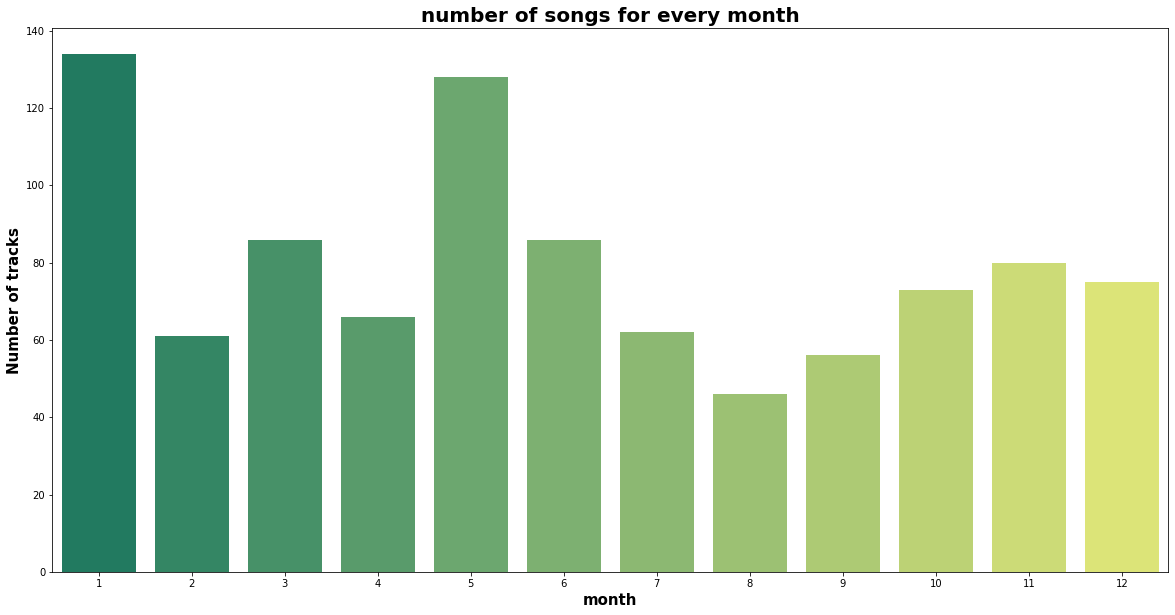

In [33]:
plt.figure(figsize=(20,10))
rel_month=df['released_month'].value_counts()
sns.barplot(x=rel_month.index,y=rel_month, palette='summer')
plt.title('number of songs for every month', fontsize=20, fontweight='bold')
plt.ylabel('Number of tracks',fontsize=15, fontweight='bold')
plt.xlabel('month',fontsize=15, fontweight='bold')
plt.show()

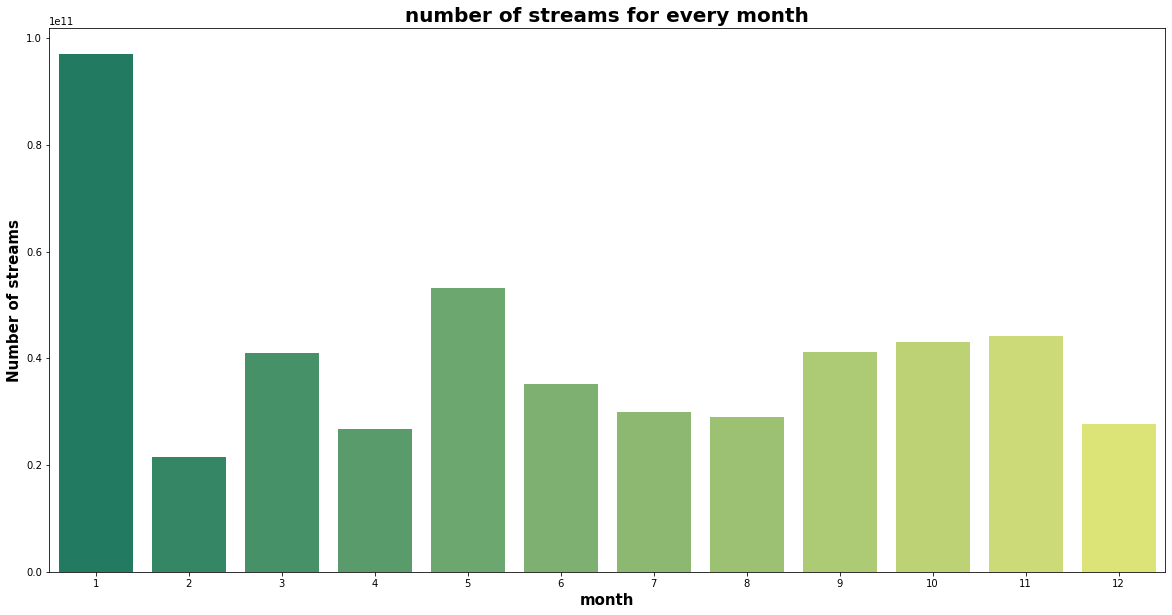

In [34]:
plt.figure(figsize=(20,10))
sum_streams=df.groupby('released_month')['streams'].sum()
sns.barplot(x=sum_streams.index,y=sum_streams,palette='summer')
plt.title('number of streams for every month', fontsize=20, fontweight='bold')
plt.ylabel('Number of streams',fontsize=15, fontweight='bold')
plt.xlabel('month',fontsize=15, fontweight='bold')
plt.show()

# 
>### Audio Features Analysis👇

In [35]:
#print columns name
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')




>>#### songs features distribution and correlation



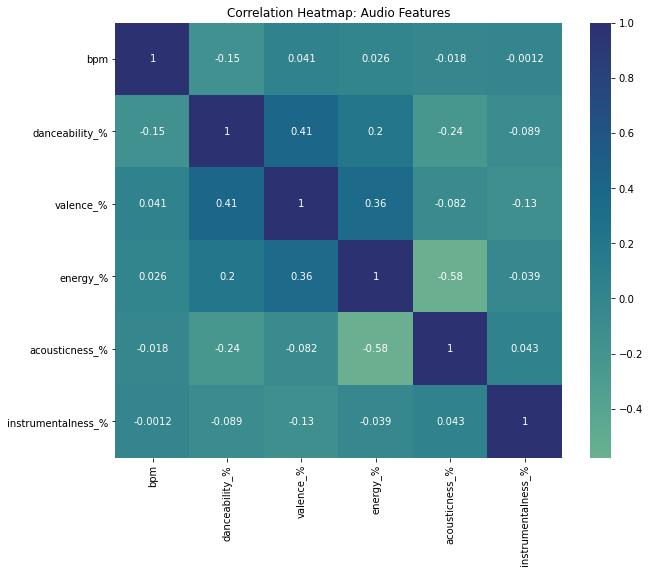

In [36]:
correlation_matrix = df[['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap: Audio Features')
plt.show()

Text(0, 0.5, 'valence')

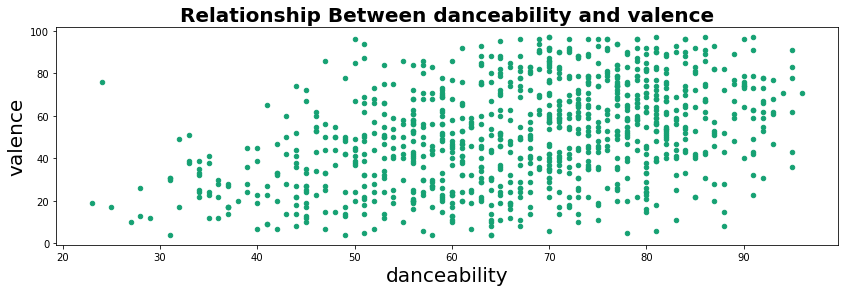

In [37]:

df.plot(x='danceability_%',y='valence_%',kind='scatter',color='#16a173',figsize=(14,4))
plt.title('Relationship Between danceability and valence',fontsize=20,fontweight='bold')
plt.xlabel('danceability',fontsize=20)
plt.ylabel('valence',fontsize=20)

Text(0, 0.5, 'valence')

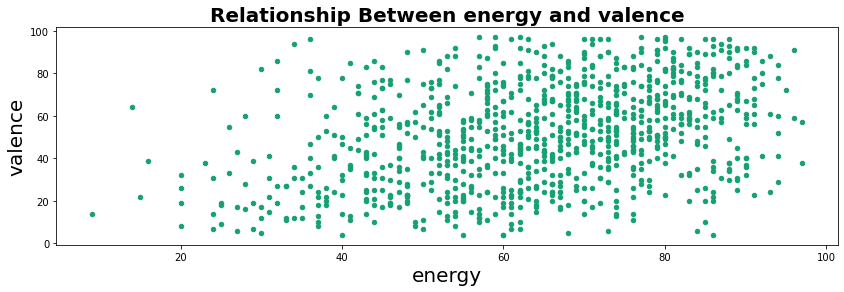

In [38]:
df.plot(x='energy_%',y='valence_%',kind='scatter',color='#16a173',figsize=(14,4))
plt.title('Relationship Between energy and valence',fontsize=20,fontweight='bold')
plt.xlabel('energy',fontsize=20)
plt.ylabel('valence',fontsize=20)

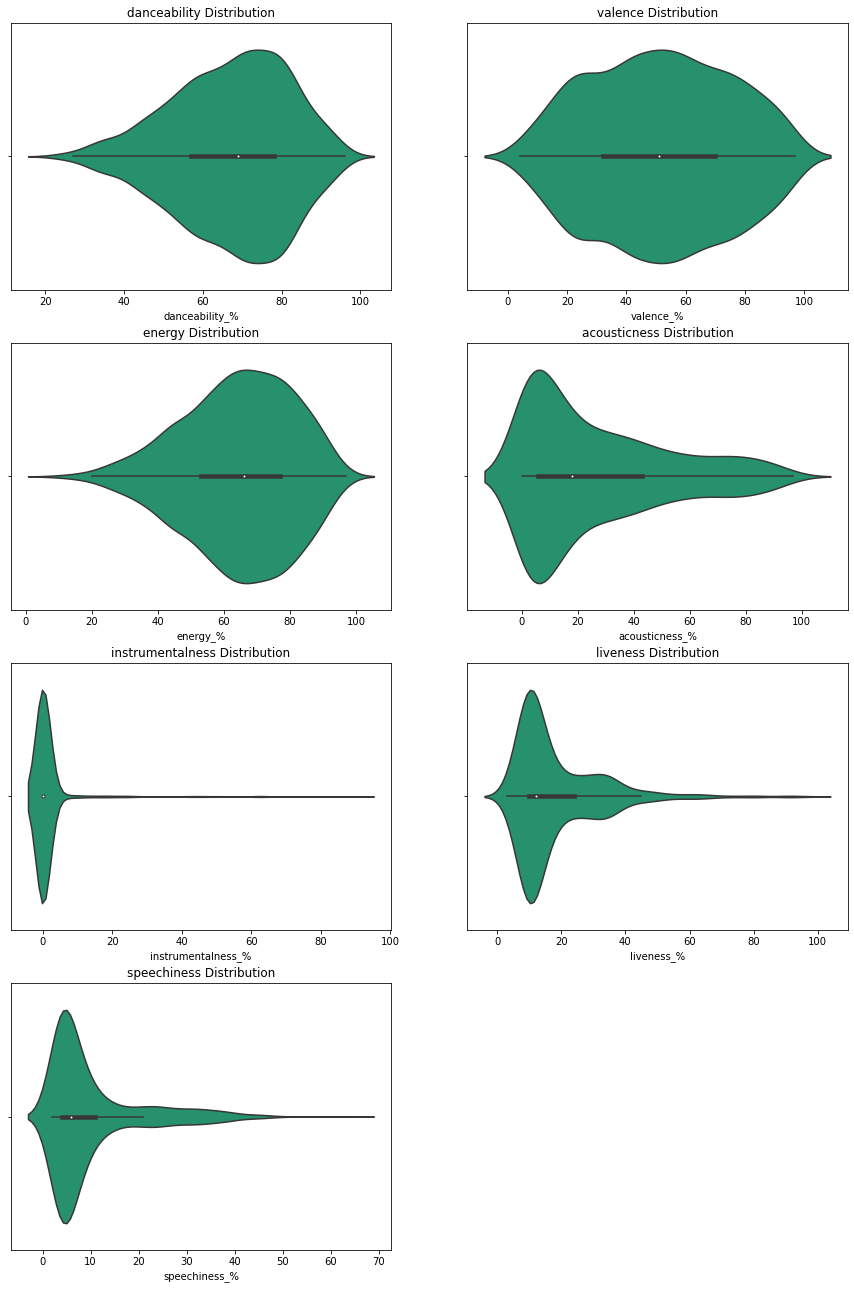

In [39]:

plt.figure(figsize=(15,3))


plt.subplot(4, 2, 1)  
sns.violinplot(x=df['danceability_%'],palette=["#16a173"])
plt.title('danceability Distribution')


plt.subplot(4, 2, 2)  
sns.violinplot(x=df['valence_%'],palette=["#16a173"])
plt.title('valence Distribution')



plt.subplot(4, 2, 3)  
sns.violinplot(x=df['energy_%'],palette=["#16a173"])
plt.title('energy Distribution')


plt.subplot(4, 2, 4)  
sns.violinplot(x=df['acousticness_%'],palette=["#16a173"])
plt.title('acousticness Distribution')


plt.subplot(4, 2, 5)  
sns.violinplot(x=df['instrumentalness_%'],palette=["#16a173"])
plt.title('instrumentalness Distribution')



plt.subplot(4, 2, 6)  
sns.violinplot(x=df['liveness_%'],palette=["#16a173"])
plt.title('liveness Distribution')



plt.subplot(4, 2, 7) 
sns.violinplot(x=df['speechiness_%'],palette=["#16a173"])
plt.title('speechiness Distribution')



plt.subplots_adjust(bottom=-4.8)

plt.show()

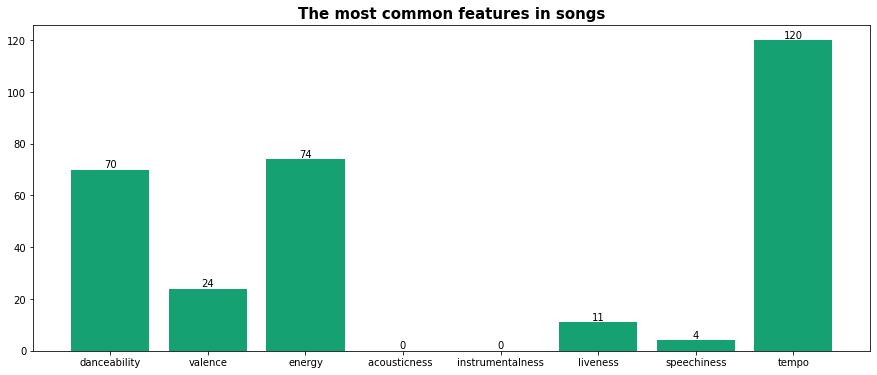

In [40]:
plt.figure(figsize=(15,6))
most_danceability = df['danceability_%'].value_counts().index[0]
most_valence = df['valence_%'].value_counts().index[0]
most_energy = df['energy_%'].value_counts().index[0]
most_acousticness = df['acousticness_%'].value_counts().index[0]
most_instrumentalness = df['instrumentalness_%'].value_counts().index[0]
most_liveness = df['liveness_%'].value_counts().index[0]
most_speechiness = df['speechiness_%'].value_counts().index[0]
most_bpm = df['bpm'].value_counts().index[0]
plt.bar(['danceability', 'valence', 'energy', 'acousticness  ', 'instrumentalness', 'liveness', 'speechiness','tempo'], [most_danceability, most_valence,most_energy, most_acousticness,most_instrumentalness, most_liveness,most_speechiness,most_bpm],color='#16a173')
#plt.ylabel('The most common features in songs',fontsize=15, fontweight='bold')
plt.title('The most common features in songs',fontsize=15, fontweight='bold')

for index, value in enumerate([most_danceability,most_valence,most_energy,most_acousticness,most_instrumentalness,most_liveness,most_speechiness,most_bpm]):
    plt.text(index, value, str(value), ha='center', va='bottom')

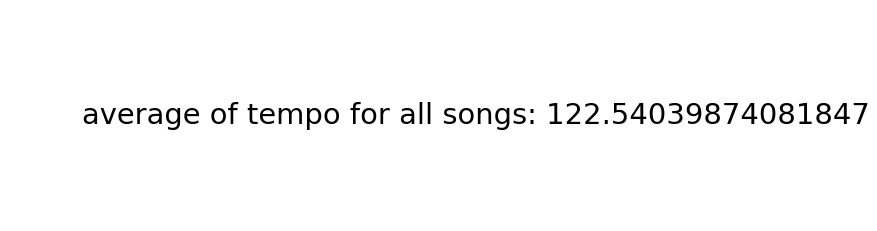

In [41]:
# average of tempo for all songs
fig, ax = plt.subplots()
bpm_mean=df['bpm'].mean()
plt.text(1.4, .5, f'average of tempo for all songs: {bpm_mean}', fontsize=29, ha='center', va='center')
ax.axis('off')
plt.show()

<AxesSubplot:ylabel='mode'>

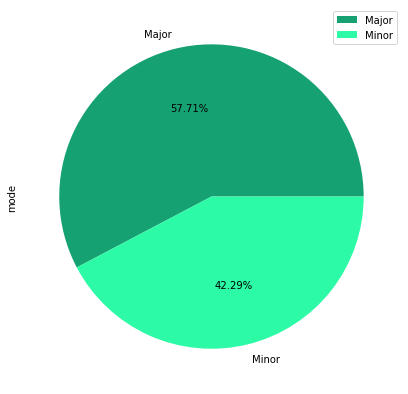

In [42]:
#music mode
plt.figure(figsize=(7,7))
df['mode'].value_counts().plot.pie(autopct = '%1.2f%%', legend = True,colors=['#16a173','#2dfaa6'])


In [43]:
# number of keys
df['key'].value_counts()

C#           120
G             96
No Record     95
G#            91
F             89
D             81
B             81
A             75
F#            73
E             62
A#            57
D#            33
Name: key, dtype: int64

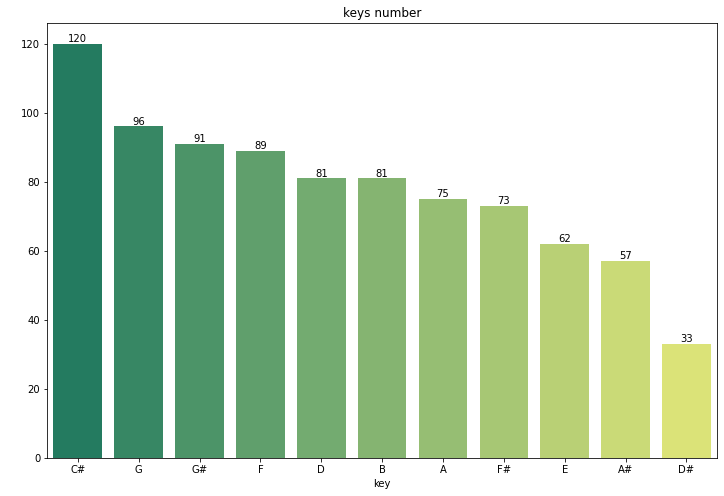

In [44]:
plt.figure(figsize=(12,8))
values_without_NULL=df['key'].value_counts()[df['key'].value_counts().index != 'No Record']
sns.barplot(x=values_without_NULL.index,y=values_without_NULL,palette='summer')
plt.title('keys number')
plt.ylabel(' ')
plt.xlabel('key')

for index, value in enumerate(df['key'].value_counts()[df['key'].value_counts().index != 'No Record']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

# 
>### Platforms Comparison👇

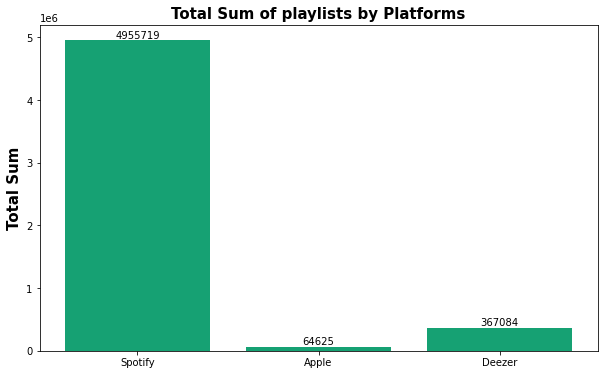

In [45]:
plt.figure(figsize=(10,6))
plt.bar(['Spotify', 'Apple', 'Deezer'], [df['in_spotify_playlists'].sum(), df['in_apple_playlists'].sum(), df['in_deezer_playlists'].sum()],color='#16a173')
plt.ylabel('Total Sum',fontsize=15, fontweight='bold')
plt.title('Total Sum of playlists by Platforms',fontsize=15, fontweight='bold')

for index, value in enumerate([df['in_spotify_playlists'].sum(),df['in_apple_playlists'].sum(), df['in_deezer_playlists'].sum()]):
    plt.text(index, value, str(value), ha='center', va='bottom')


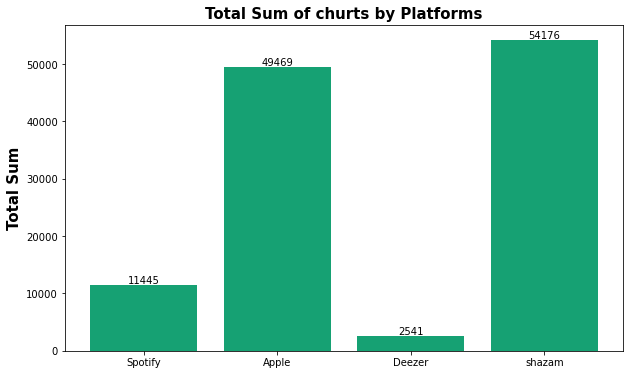

In [46]:
plt.figure(figsize=(10,6))
plt.bar(['Spotify', 'Apple', 'Deezer','shazam'], [df['in_spotify_charts'].sum(), df['in_apple_charts'].sum(), df['in_deezer_charts'].sum(), df['in_shazam_charts'].sum()],color='#16a173')
plt.ylabel('Total Sum',fontsize=15, fontweight='bold')
plt.title('Total Sum of churts by Platforms',fontsize=15, fontweight='bold')

for index, value in enumerate([df['in_spotify_charts'].sum(),df['in_apple_charts'].sum(), df['in_deezer_charts'].sum(),df['in_shazam_charts'].sum()]):
    plt.text(index, value, str(value), ha='center', va='bottom')